In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")
engine


Engine(sqlite:///hawaii.sqlite)

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [11]:
# Reflect to see all the tables and respective columns
from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
   print("Table Name: %s" % table_name)
   for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

Table Name: measurement
Column: id
Column: station
Column: date
Column: prcp
Column: tobs
Table Name: station
Column: id
Column: station
Column: name
Column: latitude
Column: longitude
Column: elevation


# Exploratory Climate Analysis

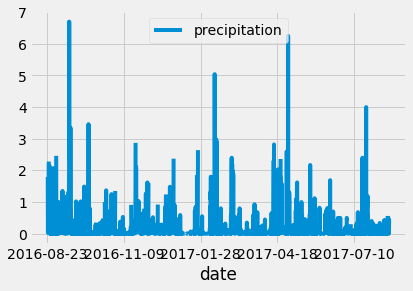

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
df = df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

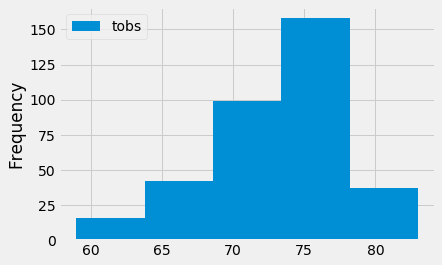

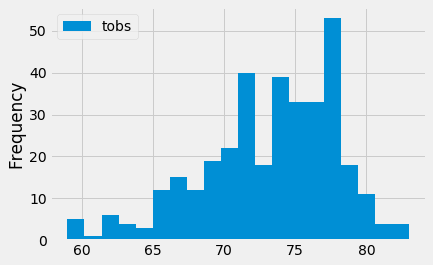

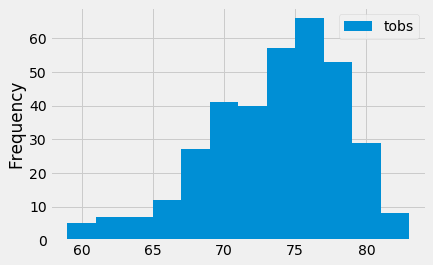

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
#plt.tight_layout()
# When creating a histogram, you’ll need to figure how many bins you need. 
# It’s recommended that you stay within a range of 5 to 20 bins. 
# You may need to play around with the data a bit to find a good fit somewhere between 5 and 20. 
# A “good fit” is one that represents the data well and highlights areas where there is a lot of data and areas where there is not a lot of data. 
# It’s all about finding the right balance.
df.plot.hist(bins=5)
df.plot.hist(bins=20)
# 12 bins is in this case a sweet spot for this data.
df.plot.hist(bins=12)

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start=None, end=None):

    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]           

    # Check if there is an end date provided
    if not end: 
        # No end data provided
        results = session.query(*sel).\
            filter(Measurement.date <= start).all()
        temps = list(np.ravel(results))
        return temps

    # Assume there is a start and end date
    results = session.query(*sel).\
    filter(Measurement.date >= start).\
    filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))

    return temps

calc_temps('2017-06-01', '2018-06-01')
calc_temps('2010-1-01')

[56.0, 72.44859359844811, 87.0]

# Challenge

In [19]:
# Module 9 Challenge
# Gather data on the seasons of Oahu and determine whether the seasons could affect the surf and ice cream shop business. 
# # Specifically, are there certain times of the year when business might be slower, or the type of customer could be different?
# Find a few key aspects of Oahu’s seasonal weather data because the investors want to ensure that there are enough customers between seasons to sustain the business throughout the year.

# Objectives
# - Determine key statistical data about the month of June.
# - Determine key statistical data about the month of December.
# - Compare your findings between the month of June and December.
# - Make 2 or 3 recommendations for further analysis.
# - Share your findings in the Jupyter Notebook.

# Instructions
# - Identify key statistical data in June and similarly in December across all of the stations and years using the describe() function.
# - Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.



In [178]:
# Design a query to retrieve the available precipitation and temperature data
# Get all the data points available in the database

results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)
#print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation','temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df.to_string(index=False))
df

,date,precipitation,temperature
date,,,
2010-01-01,2010-01-01,0.08,65.0
2010-01-01,2010-01-01,0.21,72.0
2010-01-01,2010-01-01,0.15,75.0
2010-01-01,2010-01-01,0.15,70.0
2010-01-01,2010-01-01,0.05,66.0
...,...,...,...
2017-08-22,2017-08-22,0.50,76.0
2017-08-23,2017-08-23,0.00,81.0
2017-08-23,2017-08-23,0.00,82.0


## FOCUS: June & December

In [241]:
# Separate out the June & December data respectively, creating dataframes for each month across all the available years and weather stations.
jun_data = df.loc[(pd.to_datetime(df['date']).dt.month == 6)]
dec_data = df.loc[(pd.to_datetime(df['date']).dt.month == 12)]
jun_data
dec_data

,date,precipitation,temperature
date,,,
2010-12-01,2010-12-01,0.13,70.0
2010-12-01,2010-12-01,0.04,76.0
2010-12-01,2010-12-01,0.76,73.0
2010-12-01,2010-12-01,1.35,72.0
2010-12-01,2010-12-01,1.48,71.0
...,...,...,...
2016-12-31,2016-12-31,0.90,65.0
2016-12-31,2016-12-31,0.36,72.0
2016-12-31,2016-12-31,0.25,67.0


## June

In [244]:
# Use the .describe function to get a description of the distribution of the precipitation and temperature for JULY

# OBSERVATIONS:

# Precipitation mean is 7 times larger than the median, and the standard deviation is approximately 15 times larger
# - This indicates some days with rainfalls substantially larger than the daily median.
# - Do days with heavier rains discourage surfing?
# - Is there a correlation between heavier rain days and temperature?

# Temperature mean & median are effectively the same, likely implying a normal distribution.
# - If we reasonably assume lower temperatures discourage ice cream sales then it will be worth noting the occurrence of lower quartile observations and outliers as days with potentially reduced demand.
# - Ditto re higher teperature days driving increased demand
# - There is an 11F difference between the mean/median and the minimum June temperatures

jun_data.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A350CEAC8>,
      dtype=object)

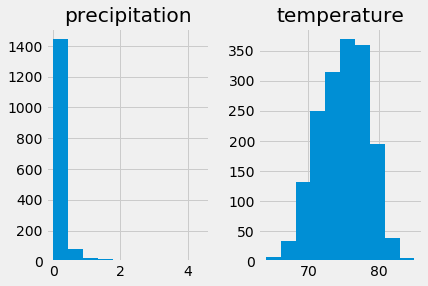

In [245]:
# Create a SIDE-BY-SIDE histogram to show for JUNE the count and number of each precipitation and temperature measurement

# OBSERVATIONS: 
# Precipitation 
# - it is readily apparent the majoprity of days in June are rain free, with a relatively small number of larger observations skewing the distribution to the RIGHT, across all the available weather stations and years.

# Temperature 
# - the mean and median observation is 75 across time & weather stations, and the distribution looks relatively normal.

jun_data.hist(bins=10)

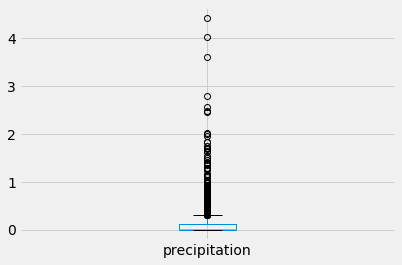

In [246]:
# Create a Box & Whisker plot to show the distribution of PRECIPITATION measurements for June.

# OBSERVATION: 
# There are high outliers, that is observations 1.5 times the interquartile range (IQR) above the median.
# - The outliers represent a number of days with substantial rainfull in contrast to the larger number of days with no or little rain.
# - What is the proportion of days that are outliers? 
# - This proportion may represent a proportion of days with reduced demand for surfing.

jun_data['precipitation'].plot.box()

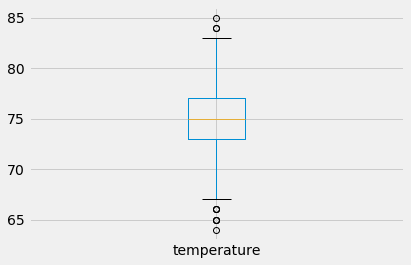

In [247]:
# Create a seperate Box & Whisker plot to show the distribution of TEMPERATURE measurements for June.

# OBSERVATION: 
# This appears to be a normal distribution around 75 amd very few outliers above and below.
# - Is there a temperature below which sees reduced demand for surfing? 
# - What proportion of days would that imply?

jun_data['temperature'].plot.box()

## December

In [251]:
# As above but this time for DECEMBER, use .describe() to get a description of the distribution of DECEMBER's precipitation and temperature

# OBSERVATIONS:
# Precipitation mean is roughly 7 times larger than the median, and the standard deviation is 18 times larger
# - This indicates some days with rainfalls substantially larger than the daily median.
# - The maximum is 2 inches larger than in June

# Temperature mean & median are effectively the same, likely implying a normal distribution.
# - The Minimum is 15F lower than the mean/median
# - The December Minimum is 8F lower than June's minimum

dec_data.describe()

,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A3528C248>,
      dtype=object)

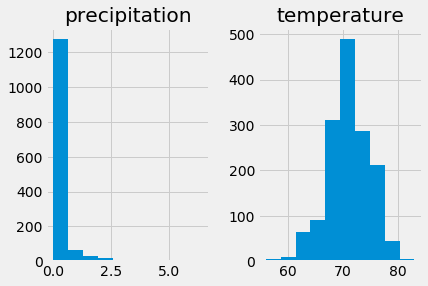

In [249]:
# Create a histogram to show the DECEMBER count and number of each (as bins) PRECIPITATION and TEMPERATURE measurements

# OBSERVATION: 

# Precipition - as per June this distribution is skewed to the right
# - There are fewer days with no rain
# - There are days with more rain than in June

# Temperature - as per June the distribution looks relatively normal
# - The mean/median has dropped 4F from 75 to 71

dec_data.hist(bins=10)

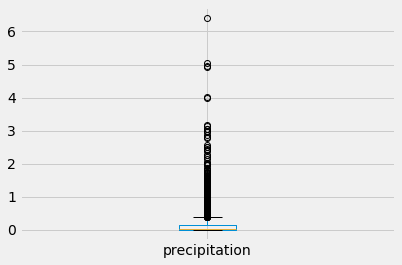

In [209]:
# Create a Box & Whisker plot to show the distribution of PRECIPITATION measurements for DECEMBER.

# OBSERVATION: 
# There are high outliers, that is observations 1.5 times the interquartile range (IQR) above the median.
# - The outliers represent a number of days with substantial rainfull in contrast to the larger number of days with no or little rain.
# - What is the proportion of days that are outliers? 
# - This proportion may represent a proportion of days with reduced demand for surfing.

dec_data['precipitation'].plot.box()

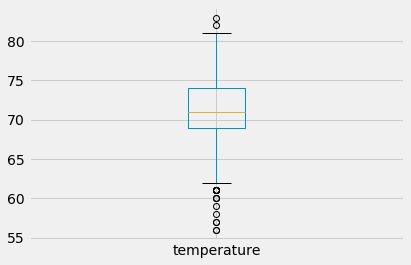

In [210]:
dec_data['temperature'].plot.box()

C:\Users\damie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


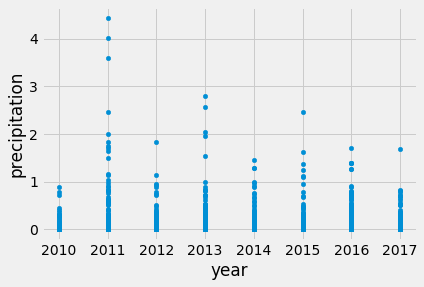

In [120]:
#pd.to_datetime(jul_v['date']).dt.year
jul_v['year'] = pd.to_datetime(jul_v['date']).dt.year
jul_v.plot(x='year',y='precipitation',kind='scatter')

In [99]:
jul_v.groupby('year').describe()

precipitation                                                   
             count      mean       std  min   25%   50%     75%   max
year                                                                 
2010         232.0  0.042241  0.112705  0.0  0.00  0.00  0.0300  0.88
2011         212.0  0.240142  0.595849  0.0  0.00  0.04  0.1625  4.43
2012         194.0  0.097062  0.223688  0.0  0.00  0.01  0.0950  1.84
2013         205.0  0.144195  0.378906  0.0  0.00  0.02  0.0800  2.80
2014         199.0  0.124372  0.240123  0.0  0.00  0.03  0.1400  1.45
2015         188.0  0.125160  0.300391  0.0  0.00  0.01  0.1150  2.47
2016         173.0  0.212312  0.327195  0.0  0.01  0.06  0.2800  1.70
2017         171.0  0.120000  0.217726  0.0  0.00  0.02  0.1500  1.69

In [100]:
jul_v['precipitation'].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: precipitation, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A20B8C448>,
      dtype=object)

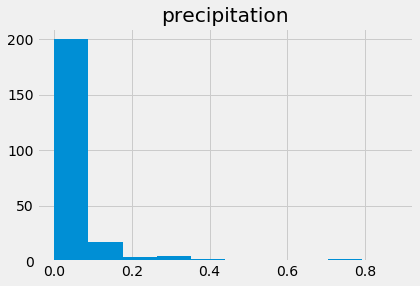

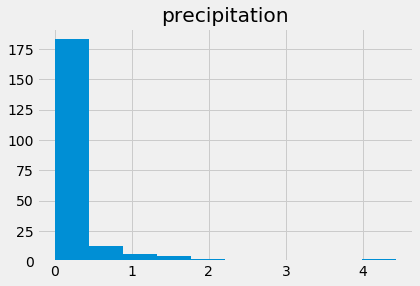

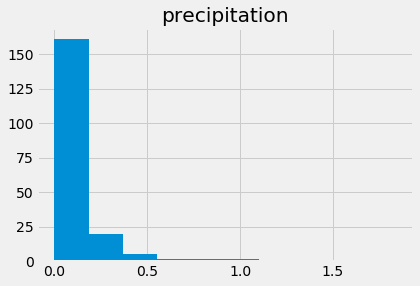

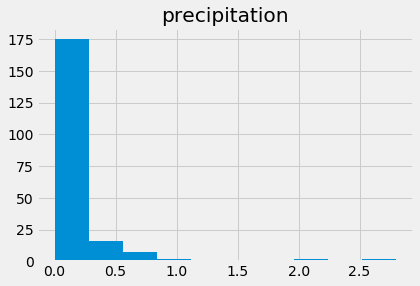

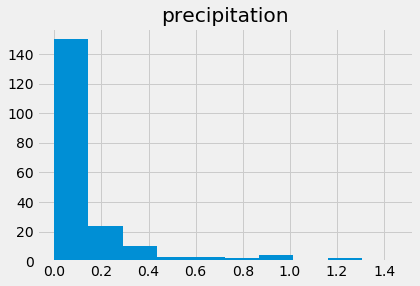

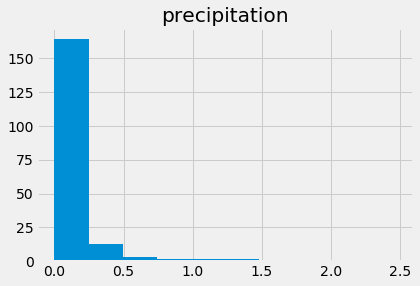

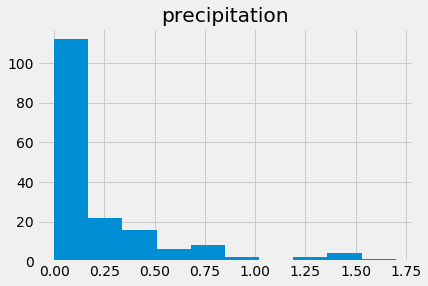

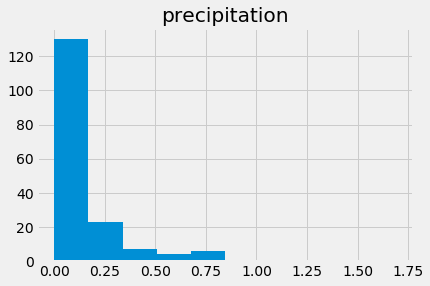

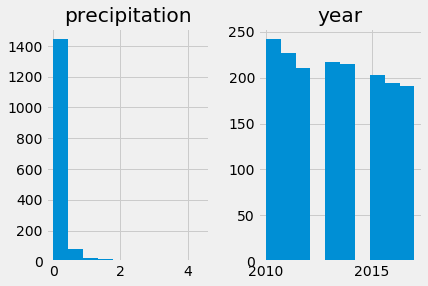

In [123]:
jul_v.groupby('year').hist()
jul_v.hist()

In [124]:
jul_v

,date,precipitation,year
date,,,
2010-06-01,2010-06-01,0.00,2010
2010-06-01,2010-06-01,0.03,2010
2010-06-01,2010-06-01,0.01,2010
2010-06-01,2010-06-01,0.00,2010
2010-06-01,2010-06-01,0.08,2010
...,...,...,...
2017-06-30,2017-06-30,0.04,2017
2017-06-30,2017-06-30,0.00,2017
2017-06-30,2017-06-30,0.12,2017
